**Q1. Write a Python function that takes in two arrays of data and calculates the F-value for a variance ratio test. The function should return the F-value and the corresponding p-value for the test.**

Null Hypothesis: The variances of data1 and data2 are equal
Alternative Hypothesis: The variances of data1 and data2 are not equal
Significance Level (alpha): 0.05
F-value: 1.450980392156863
p-value: 0.36355737599999993
Conclusion: Fail to reject the null hypothesis.


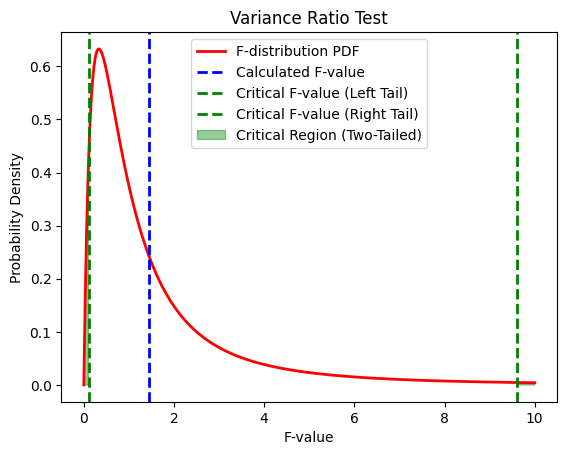

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def calculate_f_value(data1, data2):
    # Using ddof=1 to calculate the sample variance
    # Using ddof=0 to calculate the population variance
    var1 = np.var(data1, ddof=1) 
    var2 = np.var(data2, ddof=1)
    
    # Calculate the F-value
    f_value = var1 / var2
    
    # Calculate the degrees of freedom
    df1 = len(data1) - 1
    df2 = len(data2) - 1
    
    # stats.f.cdf(f_value, df1, df2) calculates the cumulative probability of
    # observing an F-value less than or equal to the calculated F-value under the null hypothesis
    # p value is the probability of observing an F-value as extreme as or more extreme than the calculated F-value,
    p_value = 1 - stats.f.cdf(f_value, df1, df2)
    
    return f_value, p_value, df1, df2

# Example data
data1 = np.array([16.0, 20.0, 25.0, 18.0, 24.0])
data2 = np.array([12.0, 15.0, 18.0, 14.0, 20.0])

# Null hypothesis: The variances of data1 and data2 are equal
# Alternative hypothesis: The variances of data1 and data2 are not equal
alpha = 0.05  # Significance level

# Calculate F-value, p-value, and degrees of freedom
f_value, p_value, df1, df2 = calculate_f_value(data1, data2)

# Calculate the critical F-values for the two tails
critical_F_left = stats.f.ppf(alpha / 2, df1, df2)
critical_F_right = stats.f.ppf(1 - alpha / 2, df1, df2)

# Print the results
print("Null Hypothesis: The variances of data1 and data2 are equal")
print("Alternative Hypothesis: The variances of data1 and data2 are not equal")
print("Significance Level (alpha):", alpha)
print("F-value:", f_value)
print("p-value:", p_value)

# Conclusion
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")

# Visualization
fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)  # Range of F-values
y = stats.f.pdf(x, df1, df2)  # Probability density function for F-distribution
plt.plot(x, y, 'r-', lw=2, label='F-distribution PDF')
plt.axvline(f_value, color='b', linestyle='--', linewidth=2, label='Calculated F-value')
plt.axvline(critical_F_left, color='green', linestyle='--', linewidth=2, label='Critical F-value (Left Tail)')
plt.axvline(critical_F_right, color='green', linestyle='--', linewidth=2, label='Critical F-value (Right Tail)')
plt.fill_between(x, 0, y, where=(x <= critical_F_left) | (x >= critical_F_right), alpha=0.4, color='green', label="Critical Region (Two-Tailed)")
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Variance Ratio Test')
plt.show()


**Q2. Given a significance level of 0.05 and the degrees of freedom for the numerator and denominator of an F-distribution, write a Python function that returns the critical F-value for a two-tailed test.**

In [2]:
import scipy.stats as stats

def get_critical_f_value(alpha, df1, df2):
    # Calculate the critical F-value for a two-tailed test
    # The significance level is divided by 2 for a two-tailed test
    alpha = alpha / 2
    
    # Use the inverse cumulative distribution function (percent point function) to find the critical F-value
    critical_f_value = stats.f.ppf(1 - alpha, df1, df2)
    
    return critical_f_value

# Example usage:
alpha = 0.05  # Significance level
df1 = 5  # Degrees of freedom for the numerator
df2 = 10  # Degrees of freedom for the denominator

critical_f_value = get_critical_f_value(alpha, df1, df2)
print(f"Critical F-value for a two-tailed test at alpha = {alpha} with df1 = {df1} and df2 = {df2} is {critical_f_value:.4f}")


Critical F-value for a two-tailed test at alpha = 0.05 with df1 = 5 and df2 = 10 is 4.2361


**Q3. Write a Python program that generates random samples from two normal distributions with known variances and uses an F-test to determine if the variances are equal. The program should output the Fvalue, degrees of freedom, and p-value for the test.**

Null Hypothesis: The variances of data1 and data2 are equal
Alternative Hypothesis: The variances of data1 and data2 are not equal
F-Statistic: 0.44
Degrees of Freedom (numerator, denominator): 99, 99
P-Value: 1.0000
Fail to reject the null hypothesis.


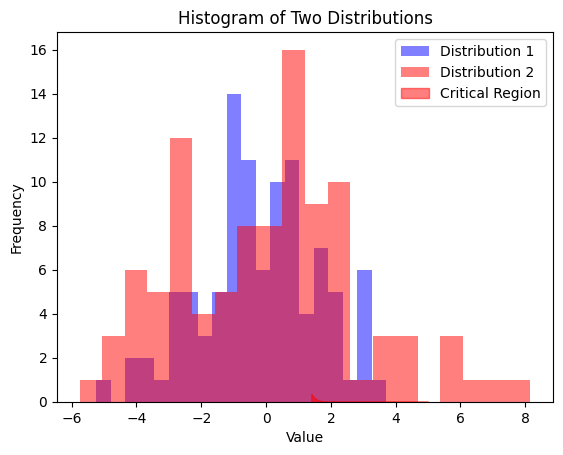

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set the parameters for the normal distributions
mean1 = 0
variance1 = 4  # Known variance for the first distribution
mean2 = 0
variance2 = 9  # Known variance for the second distribution

# Generate random samples from the two normal distributions
sample_size = 100  # Number of samples in each distribution
np.random.seed(42)  # Set a seed for reproducibility
data1 = np.random.normal(mean1, np.sqrt(variance1), sample_size)
data2 = np.random.normal(mean2, np.sqrt(variance2), sample_size)

# Perform an F-test to compare the variances
f_statistic = variance1 / variance2

# Calculate degrees of freedom for both variances
df1 = sample_size - 1
df2 = sample_size - 1

# Calculate the p-value using the F-distribution
p_value = 1 - stats.f.cdf(f_statistic, df1, df2)

# Visualize the two distributions using histograms
plt.hist(data1, bins=20, alpha=0.5, label='Distribution 1', color='blue')
plt.hist(data2, bins=20, alpha=0.5, label='Distribution 2', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Two Distributions')

# Highlight the critical region (alpha level) on the F-curve
alpha = 0.05  # Significance level

# Calculate the F-distribution values for visualization
f_values = np.linspace(0, 5, 1000)  # Adjust the range and resolution as needed
pdf_values = stats.f.pdf(f_values, df1, df2)
plt.fill_between(f_values, pdf_values, where=f_values > stats.f.ppf(1 - alpha, df1, df2), color='red', alpha=0.5, label='Critical Region')

# Output the results
print("Null Hypothesis: The variances of data1 and data2 are equal")
print("Alternative Hypothesis: The variances of data1 and data2 are not equal")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"Degrees of Freedom (numerator, denominator): {df1}, {df2}")
print(f"P-Value: {p_value:.4f}")

# Determine if the variances are equal or not based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

plt.legend()
plt.show()


**Q4.The variances of two populations are known to be 10 and 15. A sample of 12 observations is taken from each population. Conduct an F-test at the 5% significance level to determine if the variances are significantly different.**

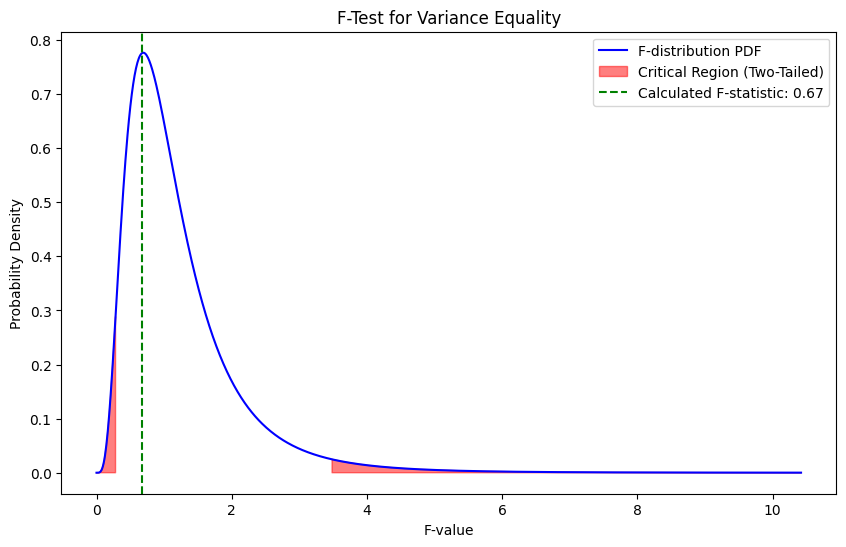

Fail to reject the null hypothesis and conclude that variances are not significantly different.


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the variances of the two populations
variance1 = 10
variance2 = 15

# Define the sample sizes
n1 = 12
n2 = 12

# Calculate the F-statistic
F_statistic = variance1 / variance2

# Calculate degrees of freedom for the numerator and denominator
df1 = n1 - 1
df2 = n2 - 1

# Define the significance level (alpha)
alpha = 0.05

# Calculate the critical F-values for the two tails
critical_F_left = stats.f.ppf(alpha / 2, df1, df2)
critical_F_right = stats.f.ppf(1 - alpha / 2, df1, df2)

# Create a range of F-values for visualization
x = np.linspace(0, 3 * max(critical_F_left, critical_F_right), 1000)
y = stats.f.pdf(x, df1, df2)

# Create a plot to visualize the F-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='F-distribution PDF', color='b')

# Highlight the critical regions for both tails
plt.fill_between(x, 0, y, where=(x < critical_F_left) | (x > critical_F_right), color='red', alpha=0.5, label='Critical Region (Two-Tailed)')

# Add a vertical line at the calculated F-statistic
plt.axvline(F_statistic, color='g', linestyle='--', label=f'Calculated F-statistic: {F_statistic:.2f}')

# Add labels and legend
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.title('F-Test for Variance Equality')
plt.legend()

# Display the plot
plt.show()

# Check if the null hypothesis is rejected
if F_statistic < critical_F_left or F_statistic > critical_F_right:
    print("Reject the null hypothesis and conclude that variances are significantly different.")
else:
    print("Fail to reject the null hypothesis and conclude that variances are not significantly different.")


**Q5. A manufacturer claims that the variance of the diameter of a certain product is 0.005. A sample of 25 products is taken, and the sample variance is found to be 0.006. Conduct an F-test at the 1% significance level to determine if the claim is justified.**

Null Hypothesis (H0): The manufacturer's claim is justified (σ^2 = 0.005)
Alternative Hypothesis (Ha): The manufacturer's claim is not justified (σ^2 ≠ 0.005)
Alpha (Significance level) = 0.01
Critical F-values (for 1% significance level): 0.3370701342685674  and 2.966741631292762
F-statistic = 1.2
Conclusion: Fail to reject the null hypothesis. The manufacturer's claim is justified.


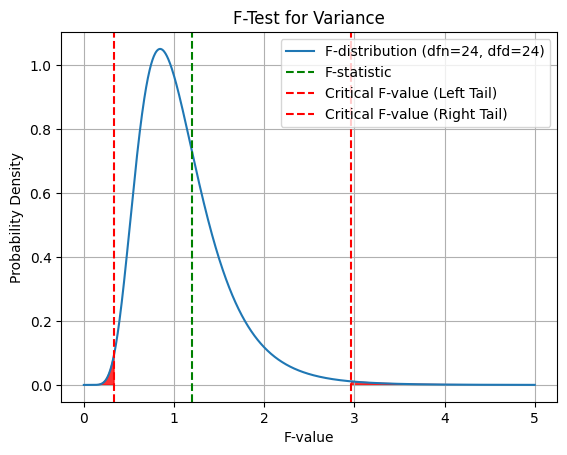

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Given data
sample_variance = 0.006
claimed_variance = 0.005
sample_size = 25
alpha = 0.01  # Significance level

# Degrees of freedom for the numerator and denominator
dfn = sample_size - 1
dfd = sample_size - 1

# Calculate the critical F-values for the two tails
critical_f_left = f.ppf(alpha / 2, dfn, dfd)
critical_f_right = f.ppf(1 - alpha / 2, dfn, dfd)

# Calculate the F-statistic
f_statistic = sample_variance / claimed_variance

# Print null, alternative hypotheses, alpha value, critical F values, and F-statistic
print("Null Hypothesis (H0): The manufacturer's claim is justified (σ^2 = 0.005)")
print("Alternative Hypothesis (Ha): The manufacturer's claim is not justified (σ^2 ≠ 0.005)")
print("Alpha (Significance level) =", alpha)
print("Critical F-values (for 1% significance level):", critical_f_left, " and", critical_f_right)
print("F-statistic =", f_statistic)

# Visualize the F-distribution and critical regions
x = np.linspace(0, 5, 1000)
y = f.pdf(x, dfn, dfd)

plt.plot(x, y, label="F-distribution (dfn={}, dfd={})".format(dfn, dfd))
plt.axvline(f_statistic, color='green', linestyle='--', label="F-statistic")
plt.axvline(critical_f_left, color='red', linestyle='--', label="Critical F-value (Left Tail)")
plt.axvline(critical_f_right, color='red', linestyle='--', label="Critical F-value (Right Tail)")
plt.fill_between(x, 0, y, where=(x < critical_f_left) | (x > critical_f_right), color='red', alpha=0.8)

plt.xlabel("F-value")
plt.ylabel("Probability Density")
plt.title("F-Test for Variance")
plt.legend()
plt.grid(True)

# Make a conclusion based on the test results
if f_statistic < critical_f_left or f_statistic > critical_f_right:
    print("Conclusion: Reject the null hypothesis. The manufacturer's claim is not justified.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The manufacturer's claim is justified.")

plt.show()


**Q6. Write a Python function that takes in the degrees of freedom for the numerator and denominator of an F-distribution and calculates the mean and variance of the distribution. The function should return the mean and variance as a tuple.**

In [6]:
# Import the scipy.stats module to access the F-distribution
import scipy.stats as stats

# Define a function that takes in the degrees of freedom for the numerator and denominator of an F-distribution
def f_dist_mean_var(numer_df, denom_df):
  # Calculate the mean of the F-distribution using the formula: mean = denom_df / (denom_df - 2) if denom_df > 2, else None
  mean = denom_df / (denom_df - 2) if denom_df > 2 else None

  # Calculate the variance of the F-distribution using the formula: var = (2 * denom_df^2 * (numer_df + denom_df - 2)) / (numer_df * (denom_df - 2)^2 * (denom_df - 4)) if denom_df > 4, else None
  var = (2 * denom_df**2 * (numer_df + denom_df - 2)) / (numer_df * (denom_df - 2)**2 * (denom_df - 4)) if denom_df > 4 else None

  # Return the mean and variance as a tuple
  return (mean, var)

In [7]:
f_dist_mean_var(5, 10)

(1.25, 1.3541666666666667)

We can test the function by passing some values for the degrees of freedom. For example, if we call the function with `numer_df = 5` and `denom_df = 10`, we should get the output `(1.25, 1.3541666666666667)`. This means that the mean of the F-distribution with 5 and 10 degrees of freedom is $$\frac{10}{10 - 2} = 1.25$$ and the variance is $$\frac{2 \times 10^2 \times (5 + 10 - 2)}{5 \times (10 - 2)^2 \times (10 - 4)} = 1.35416$$.

**Q7. A random sample of 10 measurements is taken from a normal population with unknown variance. The sample variance is found to be 25. Another random sample of 15 measurements is taken from another normal population with unknown variance, and the sample variance is found to be 20. Conduct an F-test at the 10% significance level to determine if the variances are significantly different.**

Null Hypothesis: Variances are equal
Alternative Hypothesis: Variances are not equal
Alpha Value (Significance Level): 0.1
Calculated p-value: 0.6832194382585952
Conclusion: Fail to reject the null hypothesis. The variances are not significantly different.


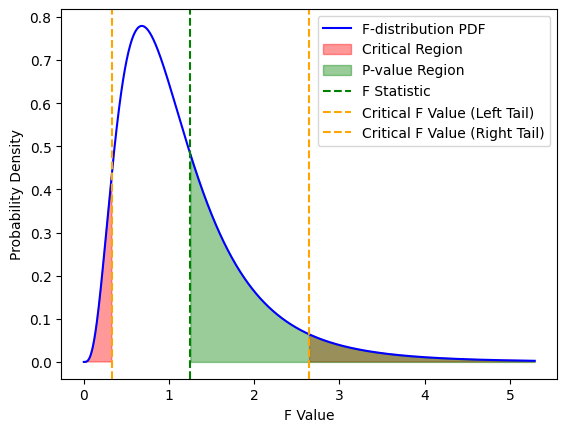

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample variances
variance1 = 25
variance2 = 20

# Sample sizes
n1 = 10
n2 = 15

# Define null and alternative hypotheses
null_hypothesis = "Variances are equal"
alternative_hypothesis = "Variances are not equal"
alpha = 0.1

# Calculate the critical F values for the two tails
df1 = n1 - 1
df2 = n2 - 1
critical_f_left = stats.f.ppf(alpha / 2, df1, df2)
critical_f_right = stats.f.ppf(1 - alpha / 2, df1, df2)

# Calculate the F-statistic
f_statistic = variance1 / variance2

# Calculate the p-value for a two-tailed test
p_value = 2 * min(stats.f.cdf(f_statistic, df1, df2), 1 - stats.f.cdf(f_statistic, df1, df2))

# Create an array of x values for the F-distribution curve
x = np.linspace(0, max(critical_f_left, critical_f_right, f_statistic) * 2, 1000)

# Calculate the F-distribution probability density function for the given degrees of freedom
pdf = stats.f.pdf(x, df1, df2)

# Print the null hypothesis, alternative hypothesis, alpha value, p value
print("Null Hypothesis:", null_hypothesis)
print("Alternative Hypothesis:", alternative_hypothesis)
print("Alpha Value (Significance Level):", alpha)
print("Calculated p-value:", p_value)

# Conclusion based on the p-value
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The variances are significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The variances are not significantly different.")

# Create a plot of the F-distribution
plt.plot(x, pdf, label='F-distribution PDF', color='b')

# Shade the critical regions for both tails
plt.fill_between(x, pdf, where=(x <= critical_f_left) | (x >= critical_f_right), color='red', alpha=0.4, label='Critical Region')

# Shade the p-value region
plt.fill_between(x, pdf, where=(x >= f_statistic), color='green', alpha=0.4, label='P-value Region')

# Plot the F-statistic and critical F values for both tails
plt.axvline(f_statistic, color='green', linestyle='--', label='F Statistic')
plt.axvline(critical_f_left, color='orange', linestyle='--', label='Critical F Value (Left Tail)')
plt.axvline(critical_f_right, color='orange', linestyle='--', label='Critical F Value (Right Tail)')

# Set labels and legend
plt.xlabel('F Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


**Q8. The following data represent the waiting times in minutes at two different restaurants on a Saturday night: Restaurant A: 24, 25, 28, 23, 22, 20, 27; Restaurant B: 31, 33, 35, 30, 32, 36. Conduct an F-test at the 5%
significance level to determine if the variances are significantly different.**

Null Hypothesis (H0): The variances of the two samples are equal.
Alternative Hypothesis (Ha): The variances of the two samples are significantly different.
F-statistic: 1.46
Critical F-scores (Left Tail): 0.17
Critical F-scores (Right Tail): 6.98
Conclusion: Fail to reject the null hypothesis. The variances are not significantly different.


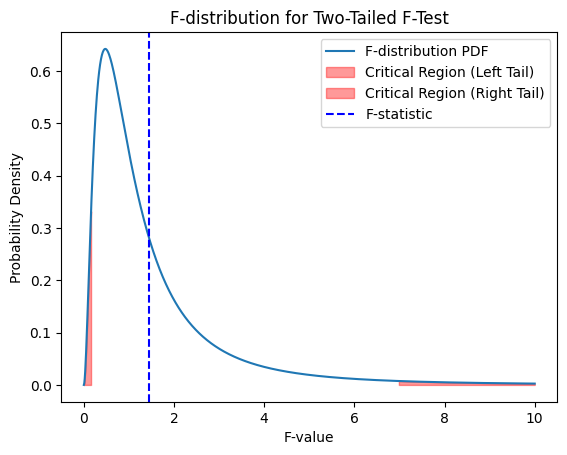

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Data for waiting times
restaurant_a = [24, 25, 28, 23, 22, 20, 27]
restaurant_b = [31, 33, 35, 30, 32, 36]

# Calculate the variances
variance_a = np.var(restaurant_a, ddof=1)  # ddof=1 for sample variance
variance_b = np.var(restaurant_b, ddof=1)

# Degrees of freedom for each sample
df_a = len(restaurant_a) - 1
df_b = len(restaurant_b) - 1

# Calculate the F-statistic
f_statistic = variance_a / variance_b

# Set the significance level
alpha = 0.05

# Calculate the critical F-scores based on a two-tailed test
# variances are significantly different in both directions
# (either sample 1's variance is significantly smaller or 
# significantly larger than sample 2's variance).
critical_f_left = f.ppf(alpha / 2, dfn=df_a, dfd=df_b)
critical_f_right = f.ppf(1 - alpha / 2, dfn=df_a, dfd=df_b)

# Print null and alternative hypotheses
print("Null Hypothesis (H0): The variances of the two samples are equal.")
print("Alternative Hypothesis (Ha): The variances of the two samples are significantly different.")

# Print F-statistic and critical F-scores
print(f"F-statistic: {f_statistic:.2f}")
print(f"Critical F-scores (Left Tail): {critical_f_left:.2f}")
print(f"Critical F-scores (Right Tail): {critical_f_right:.2f}")

# Conclusion based on the decision
if f_statistic < critical_f_left or f_statistic > critical_f_right:
    print("Conclusion: Reject the null hypothesis. The variances are significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The variances are not significantly different.")

# Create an F-distribution plot
x = np.linspace(0, 10, 1000)
y = f.pdf(x, dfn=df_a, dfd=df_b)

plt.plot(x, y, label='F-distribution PDF')
plt.fill_between(x, 0, y, where=(x < critical_f_left), color='red', alpha=0.4, label='Critical Region (Left Tail)')
plt.fill_between(x, 0, y, where=(x > critical_f_right), color='red', alpha=0.4, label='Critical Region (Right Tail)')
plt.axvline(f_statistic, color='blue', linestyle='--', label='F-statistic')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('F-distribution for Two-Tailed F-Test')
plt.show()


**Q9. The following data represent the test scores of two groups of students:**

`Group A: 80, 85, 90, 92, 87, 83;`
`Group B: 75, 78, 82, 79, 81, 84.` 

**Conduct an F-test at the 1% significance level to determine if the variances
are significantly different**

**Now you can write a python code using matplotlib to visualize the above answer with detailed comments for each line of the code in such a manner that even a beginner student can understand the code easily. Please print null, alternate hypothesis, f statistic, critical f score and conclusion based on the decision. Then visualize f statistic as dashed line and critical region as a shaded area in the f curve.**

Null Hypothesis: The variances of both groups are equal.
Alternate Hypothesis: The variances of both groups are significantly different.
F-Statistic: 1.94
Critical F-Scores (Left Tail): 0.07
Critical F-Scores (Right Tail): 14.94
Conclusion: Fail to reject the null hypothesis


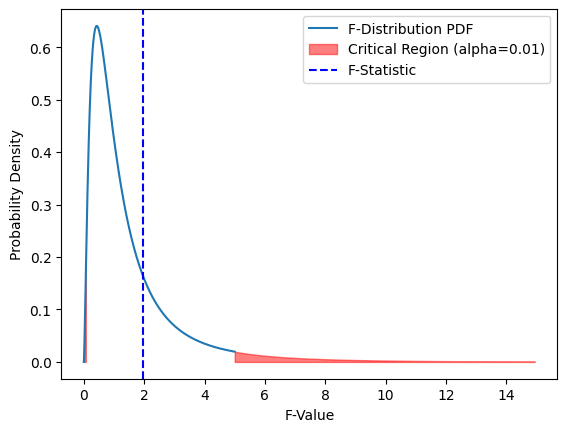

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Define the test score data for both group of students
group_a = np.array([80, 85, 90, 92, 87, 83])
group_b = np.array([75, 78, 82, 79, 81, 84])

# Calculate the sample variances for both groups
variance_a = np.var(group_a, ddof=1)  # ddof=1 for unbiased estimate
variance_b = np.var(group_b, ddof=1)

# Define the significance level (alpha) for the F-test
alpha = 0.01

# Calculate the F-statistic
f_statistic = variance_a / variance_b

# Define degrees of freedom for both groups
df1 = len(group_a) - 1
df2 = len(group_b) - 1

# Calculate the critical F-scores from the F-distribution for the two tails
critical_f_left = f.ppf(alpha / 2, df1, df2)
critical_f_right = f.ppf(1 - alpha / 2, df1, df2)

# Print the null and alternate hypotheses
print("Null Hypothesis: The variances of both groups are equal.")
print("Alternate Hypothesis: The variances of both groups are significantly different.")

# Print the F-statistic and critical F-scores
print(f"F-Statistic: {f_statistic:.2f}")
print(f"Critical F-Scores (Left Tail): {critical_f_left:.2f}")
print(f"Critical F-Scores (Right Tail): {critical_f_right:.2f}")

# Determine whether to reject the null hypothesis
if f_statistic < critical_f_left or f_statistic > critical_f_right:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print("Conclusion:", conclusion)

# Create an F-distribution curve for visualization
x = np.linspace(0, 5, 1000)  # Adjust the range based on your data
y = f.pdf(x, df1, df2)

# Create shaded regions for the critical regions
x_shaded_left = np.linspace(0, critical_f_left, 1000)
y_shaded_left = f.pdf(x_shaded_left, df1, df2)
x_shaded_right = np.linspace(critical_f_right, 5, 1000)
y_shaded_right = f.pdf(x_shaded_right, df1, df2)

# Plot the F-distribution curve
plt.plot(x, y, label="F-Distribution PDF")

# Plot the critical regions as shaded areas
plt.fill_between(x_shaded_left, y_shaded_left, color='red', alpha=0.5, label=f'Critical Region (alpha={alpha})')
plt.fill_between(x_shaded_right, y_shaded_right, color='red', alpha=0.5)

# Plot the F-statistic as a dashed line
plt.axvline(f_statistic, color='blue', linestyle='--', label='F-Statistic')

# Set labels and legends
plt.xlabel("F-Value")
plt.ylabel("Probability Density")
plt.legend()

# Show the plot
plt.show()
